Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn import svm
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix

#Feature selection, label encoder, data plot

Read the files

In [2]:
df_train=pd.read_csv("DUMD_train.csv")
df_test=pd.read_csv("DUMD_test.csv")

Training and testing data splitting

In [3]:
x_train=df_train.iloc[:,:-1]
y_train=df_train['UNS']
x_test=df_test.iloc[:,:-1]
y_test=df_test['UNS']
x_train

,STG,SCG,STR,LPR,PEG
0,0.00,0.00,0.00,0.00,0.00
1,0.08,0.08,0.10,0.24,0.90
2,0.10,0.10,0.15,0.65,0.30
3,0.08,0.08,0.08,0.98,0.24
4,0.09,0.15,0.40,0.10,0.66
...,...,...,...,...,...
318,0.90,0.78,0.62,0.32,0.89
319,0.85,0.82,0.66,0.83,0.83
320,0.56,0.60,0.77,0.13,0.32
321,0.66,0.68,0.81,0.57,0.57


Show the first 5 records of the data

In [4]:
x_train.head()

,STG,SCG,STR,LPR,PEG
0,0.00,0.00,0.00,0.00,0.00
1,0.08,0.08,0.10,0.24,0.90
2,0.10,0.10,0.15,0.65,0.30
3,0.08,0.08,0.08,0.98,0.24
4,0.09,0.15,0.40,0.10,0.66


Selecet the highest two features with chi-squared statistics , Explain -----------------

In [5]:
chi2_features = SelectKBest(chi2, k = 2)
X_kbest_features = chi2_features.fit_transform(x_train, y_train)

LPR and PEG columns are the most important two features

In [6]:
x_train=df_train.loc[:,['LPR','PEG']]
x_test=df_test.loc[:,['LPR','PEG']]
x_train

,LPR,PEG
0,0.00,0.00
1,0.24,0.90
2,0.65,0.30
3,0.98,0.24
4,0.10,0.66
...,...,...
318,0.32,0.89
319,0.83,0.83
320,0.13,0.32
321,0.57,0.57


Label Encoding for the test and train data

In [7]:
labelencoder_y_train=LabelEncoder()
labelencoder_y_test=LabelEncoder()
y_train_encoded = labelencoder_y_train.fit_transform(y_train)
y_test_encoded =labelencoder_y_test.fit_transform(y_test)
y_train_encoded

array([3, 0, 2, 1, 2, 2, 1, 0, 0, 1, 2, 0, 3, 1, 1, 2, 1, 2, 2, 1, 1, 0,
       3, 1, 0, 2, 1, 1, 0, 1, 1, 1, 3, 0, 2, 2, 3, 2, 2, 0, 1, 1, 1, 2,
       0, 1, 2, 2, 1, 3, 3, 2, 0, 3, 0, 3, 1, 1, 1, 1, 2, 2, 1, 1, 3, 1,
       2, 2, 2, 3, 0, 1, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 0, 1, 1, 0, 0, 2,
       2, 3, 2, 0, 1, 2, 0, 0, 1, 1, 2, 1, 2, 3, 0, 2, 2, 1, 1, 2, 1, 3,
       2, 2, 1, 3, 1, 0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 0, 0, 3, 0, 2, 0, 1,
       0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 2, 1, 1, 2, 3, 3, 2, 3, 1, 0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 0,
       1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1, 0, 2, 0, 2, 1, 2, 0, 2, 1,
       2, 2, 2, 1, 0, 2, 2, 0, 3, 1, 0, 0, 1, 2, 1, 0, 3, 2, 3, 0, 2, 0,
       3, 0, 3, 1, 0, 1, 1, 1, 2, 1, 2, 3, 1, 2, 0, 1, 2, 0, 2, 2, 3, 0,
       3, 3, 2, 2, 0, 3, 2, 3, 0, 3, 0, 3, 1, 0, 0, 1, 0, 1, 2, 1, 2, 0,
       3, 0, 3, 0, 2, 0, 1, 0, 0, 2, 0, 3, 1, 2, 1, 3, 1, 2, 1, 2, 0, 1,
       3, 1, 2, 1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 0, 0,

Plot the data 

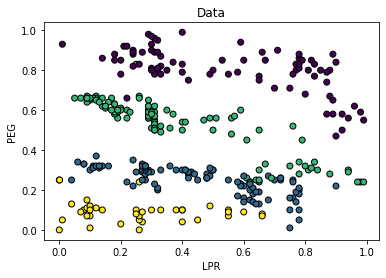

In [8]:
plt.scatter(x_train.iloc[:,0],x_train.iloc[:,1],c=y_train_encoded,edgecolors='k',alpha=1)
plt.title('Data')
plt.xlabel('LPR')
plt.ylabel('PEG')
plt.show()

# SVM and Perceptron

Train the SVM model

In [9]:
svm_model = svm.SVC()
svm_model.fit(x_train, y_train_encoded)
ys_predicted = svm_model.predict(x_test)

Plot the accuracies and confusion matrix for SVM


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.96      1.00      0.98        26
           2       1.00      1.00      1.00        22
           3       1.00      0.91      0.95        11

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.98        80
weighted avg       0.99      0.99      0.99        80


Confusion Matrix:

[[21  0  0  0]
 [ 0 26  0  0]
 [ 0  0 22  0]
 [ 0  1  0 10]]

Accuracy Score:

0.9875
\Confusion Matrix Display:



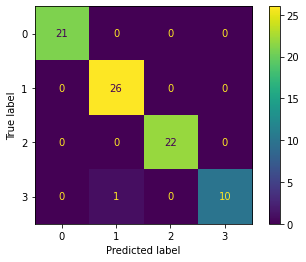

In [10]:
print('\nClassification Report:\n')
print(classification_report(y_test_encoded, ys_predicted))
print('\nConfusion Matrix:\n')
cm = confusion_matrix(y_test_encoded, ys_predicted)
print(cm)
print('\nAccuracy Score:\n')
print(accuracy_score(y_test_encoded, ys_predicted))
print('\Confusion Matrix Display:\n')
print(ConfusionMatrixDisplay(cm).plot())

Decision boundaries for SVM

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


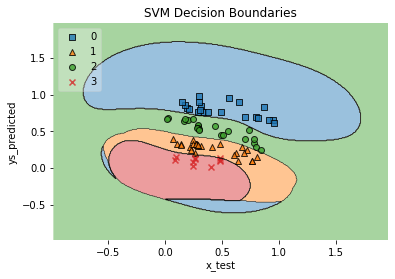

In [11]:
plot_decision_regions(x_test.to_numpy(), ys_predicted, clf=svm_model, legend=2)

plt.title('SVM Decision Boundaries')
plt.xlabel('x_test')
plt.ylabel('ys_predicted')
plt.show()

Train the perceptron algorithm

In [12]:
perc_model = Perceptron(tol=1e-3, random_state=0)
perc_model.fit(x_train, y_train_encoded)
yp_predicted = perc_model.predict(x_test)

Plot the accuracies and confusion matrix for Perceptron


Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       0.46      1.00      0.63        26
           2       0.00      0.00      0.00        22
           3       1.00      0.09      0.17        11

    accuracy                           0.60        80
   macro avg       0.60      0.52      0.44        80
weighted avg       0.54      0.60      0.48        80


Confusion Matrix:

[[21  0  0  0]
 [ 0 26  0  0]
 [ 1 21  0  0]
 [ 0 10  0  1]]

Accuracy Score:

0.6
\Confusion Matrix Display:



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


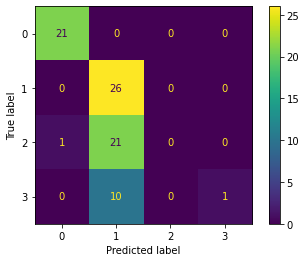

In [13]:
print('\nClassification Report:\n')
print(classification_report(y_test_encoded, yp_predicted))
print('\nConfusion Matrix:\n')
cm = confusion_matrix(y_test_encoded, yp_predicted)
print(cm)
print('\nAccuracy Score:\n')
print(accuracy_score(y_test_encoded, yp_predicted))
print('\Confusion Matrix Display:\n')
print(ConfusionMatrixDisplay(cm).plot())

Decision boundaries for perceptron

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


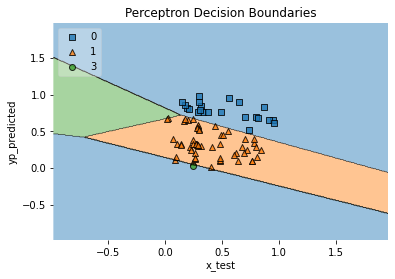

In [14]:
plot_decision_regions(x_test.to_numpy(), yp_predicted, clf=perc_model, legend=2)

plt.title('Perceptron Decision Boundaries')
plt.xlabel('x_test')
plt.ylabel('yp_predicted')
plt.show()

# One v Rest

## Preparing

Multi Label Binarizer to extend the train and test label to multi binarized classes 

In [15]:
y_train_encoded_reshaped = y_train_encoded.reshape((-1,1))
y_test_encoded_reshaped = y_test_encoded.reshape((-1,1))
mlb = MultiLabelBinarizer()
yb = mlb.fit_transform(y_train_encoded_reshaped)
ytb = mlb.fit_transform(y_test_encoded_reshaped)
yb

array([[0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       ...,
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

Separate each train and test binarized class in array

In [16]:
yb1 = yb[:,0]
yb2 = yb[:,1]
yb3 = yb[:,2]
yb4 = yb[:,3]

ytb1 = ytb[:,0]
ytb2 = ytb[:,1]
ytb3 = ytb[:,2]
ytb4 = ytb[:,3]

## First binarized model

First SVM model and its accuracy

In [17]:
clf_1 = svm.SVC(probability=True)
clf_1.fit(x_train, yb1)
yb1_pred = clf_1.predict(x_test)
yb1_pred_prop = clf_1.predict_proba(x_test)[:,1].reshape(-1,1)

print('\nAccuracy Score:\n')
print(accuracy_score(ytb1, yb1_pred))


Accuracy Score:

1.0


Accuracies and confusion matrix for the first model


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        21

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80


Confusion Matrix:

[[59  0]
 [ 0 21]]

Accuracy Score:

1.0
\Confusion Matrix Display:



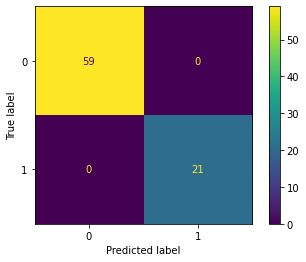

In [18]:
print('\nClassification Report:\n')
print(classification_report(ytb1, yb1_pred))
print('\nConfusion Matrix:\n')
cm = confusion_matrix(ytb1, yb1_pred)
print(cm)
print('\nAccuracy Score:\n')
print(accuracy_score(ytb1, yb1_pred))
print('\Confusion Matrix Display:\n')
print(ConfusionMatrixDisplay(cm).plot())

Plot the decision boundaries for the first model

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


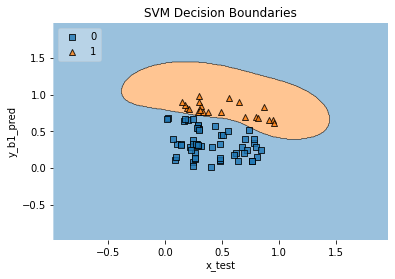

In [19]:
plot_decision_regions(x_test.to_numpy(), yb1_pred, clf=clf_1, legend=2)

plt.title('SVM Decision Boundaries')
plt.xlabel('x_test')
plt.ylabel('y_b1_pred')
plt.show()

## Second binarized model

Second SVM model and its accuracy

In [20]:
clf_2 = svm.SVC(probability=True)
clf_2.fit(x_train, yb2)
yb2_pred = clf_2.predict(x_test)
yb2_pred_prop = clf_2.predict_proba(x_test)[:,1].reshape(-1,1)

print('\nAccuracy Score:\n')
print(accuracy_score(ytb2, yb2_pred))


Accuracy Score:

0.975


Accuracies and confusion matrix for the second model


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.93      1.00      0.96        26

    accuracy                           0.97        80
   macro avg       0.96      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80


Confusion Matrix:

[[52  2]
 [ 0 26]]

Accuracy Score:

0.975
\Confusion Matrix Display:



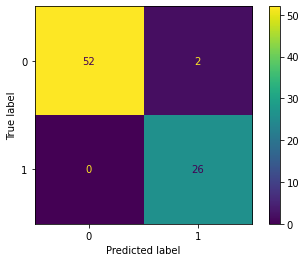

In [21]:
print('\nClassification Report:\n')
print(classification_report(ytb2, yb2_pred))
print('\nConfusion Matrix:\n')
cm = confusion_matrix(ytb2, yb2_pred)
print(cm)
print('\nAccuracy Score:\n')
print(accuracy_score(ytb2, yb2_pred))
print('\Confusion Matrix Display:\n')
print(ConfusionMatrixDisplay(cm).plot())

Plot the decision boundaries for the second model

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


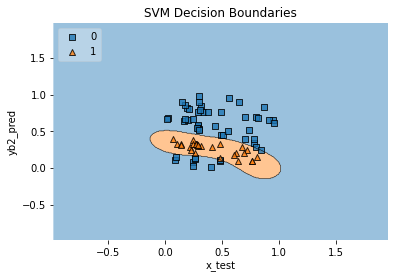

In [22]:
plot_decision_regions(x_test.to_numpy(), yb2_pred, clf=clf_2, legend=2)

plt.title('SVM Decision Boundaries')
plt.xlabel('x_test')
plt.ylabel('yb2_pred')
plt.show()

## Third binarized model

Third SVM model and its accuracy

In [23]:
clf_3 = svm.SVC(probability=True)
clf_3.fit(x_train, yb3)
yb3_pred = clf_3.predict(x_test)
yb3_pred_prop = clf_3.predict_proba(x_test)[:,1].reshape(-1,1)

print('\nAccuracy Score:\n')
print(accuracy_score(ytb3, yb3_pred))


Accuracy Score:

1.0


Accuracies and confusion matrix for the third model


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        22

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80


Confusion Matrix:

[[58  0]
 [ 0 22]]

Accuracy Score:

1.0
\Confusion Matrix Display:



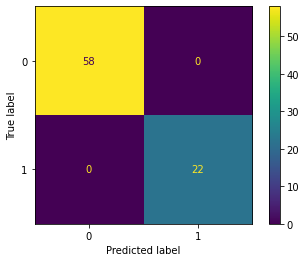

In [24]:
print('\nClassification Report:\n')
print(classification_report(ytb3, yb3_pred))
print('\nConfusion Matrix:\n')
cm = confusion_matrix(ytb3, yb3_pred)
print(cm)
print('\nAccuracy Score:\n')
print(accuracy_score(ytb3, yb3_pred))
print('\Confusion Matrix Display:\n')
print(ConfusionMatrixDisplay(cm).plot())

Plot the decision boundaries for the third model

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


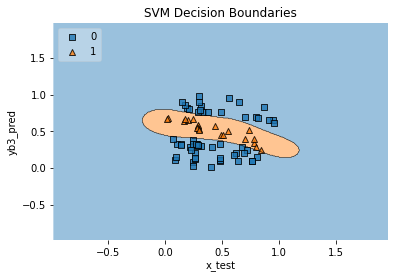

In [25]:
plot_decision_regions(x_test.to_numpy(), yb3_pred, clf=clf_3, legend=2)

plt.title('SVM Decision Boundaries')
plt.xlabel('x_test')
plt.ylabel('yb3_pred')
plt.show()

## Fourth binarized model

Fourth SVM model and its accuracy

In [26]:
clf_4 = svm.SVC(probability=True)
clf_4.fit(x_train, yb4)
yb4_pred = clf_4.predict(x_test)
yb4_pred_prop = clf_4.predict_proba(x_test)[:,1].reshape(-1,1)
print(yb4_pred)
print('\nAccuracy Score:\n')
print(accuracy_score(ytb4, yb4_pred))

[0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 1 0 0]

Accuracy Score:

0.9875


Accuracies and confusion matrix for the fourth model


Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        69
           1       1.00      0.91      0.95        11

    accuracy                           0.99        80
   macro avg       0.99      0.95      0.97        80
weighted avg       0.99      0.99      0.99        80


Confusion Matrix:

[[69  0]
 [ 1 10]]

Accuracy Score:

0.9875
\Confusion Matrix Display:



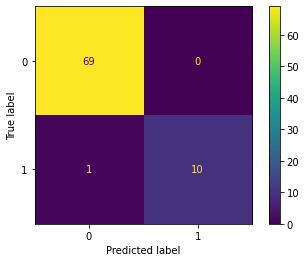

In [27]:
print('\nClassification Report:\n')
print(classification_report(ytb4, yb4_pred))
print('\nConfusion Matrix:\n')
cm = confusion_matrix(ytb4, yb4_pred)
print(cm)
print('\nAccuracy Score:\n')
print(accuracy_score(ytb4, yb4_pred))
print('\Confusion Matrix Display:\n')
print(ConfusionMatrixDisplay(cm).plot())

Plot the decision boundaries for the fourth model

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


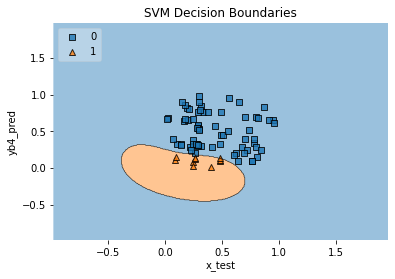

In [28]:
plot_decision_regions(x_test.to_numpy(), yb4_pred, clf=clf_4, legend=2)

plt.title('SVM Decision Boundaries')
plt.xlabel('x_test')
plt.ylabel('yb4_pred')
plt.show()

## Final label of OvR

Stack stores all the probabilites for the 4 binarized models

In [29]:
yb_all = np.hstack((yb1_pred_prop, yb2_pred_prop, yb3_pred_prop, yb4_pred_prop))
yb_all

array([[3.69725118e-02, 3.94925208e-03, 9.37352594e-01, 6.98618722e-03],
       [9.30974309e-03, 4.35755139e-02, 9.03366906e-01, 3.18960011e-04],
       [1.73253581e-02, 1.19461721e-03, 9.68153019e-01, 9.92942301e-04],
       [1.44258725e-02, 4.99646111e-03, 2.96639862e-04, 9.99982510e-01],
       [9.09514524e-01, 2.67745315e-05, 1.60073241e-01, 4.94492381e-03],
       [9.92396646e-01, 4.90539698e-05, 5.41801704e-03, 2.12032329e-02],
       [1.08947279e-03, 5.65409062e-02, 9.33138462e-01, 6.99040664e-05],
       [9.89240685e-01, 4.38605615e-05, 1.52733946e-02, 1.16504899e-02],
       [1.03332332e-03, 9.15401126e-01, 1.54386598e-02, 2.62426781e-03],
       [1.06321110e-02, 5.05809071e-04, 9.68020074e-01, 1.89083564e-04],
       [1.28154841e-03, 4.64234650e-02, 9.38916565e-01, 7.75029559e-05],
       [1.96103496e-03, 6.70286198e-01, 4.25426929e-01, 3.36874971e-04],
       [9.39360252e-01, 1.09425034e-04, 1.19680167e-01, 1.02636502e-02],
       [9.58839691e-03, 4.01431698e-02, 3.17470823e

argmax to aggregate the right class from the stack

In [30]:
# final_label = mlb.classes_[np.argmax(yb_all, axis=1)]
final_label = np.argmax(yb_all, axis=1)
final_label = final_label.reshape((-1,1))
final_label

array([[2],
       [2],
       [2],
       [3],
       [0],
       [0],
       [2],
       [0],
       [1],
       [2],
       [2],
       [1],
       [0],
       [3],
       [0],
       [1],
       [2],
       [0],
       [1],
       [2],
       [1],
       [1],
       [2],
       [2],
       [2],
       [1],
       [2],
       [0],
       [2],
       [0],
       [0],
       [0],
       [2],
       [0],
       [1],
       [0],
       [1],
       [3],
       [1],
       [1],
       [2],
       [0],
       [1],
       [2],
       [1],
       [0],
       [1],
       [0],
       [3],
       [1],
       [2],
       [0],
       [1],
       [0],
       [1],
       [3],
       [1],
       [1],
       [2],
       [0],
       [0],
       [1],
       [3],
       [2],
       [1],
       [3],
       [3],
       [3],
       [0],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [1],
       [3],
       [0],
       [1]])

## Accuracies and confusion matrix of the final label


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.96      1.00      0.98        26
           2       1.00      1.00      1.00        22
           3       1.00      0.91      0.95        11

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.98        80
weighted avg       0.99      0.99      0.99        80


Confusion Matrix:

[[21  0  0  0]
 [ 0 26  0  0]
 [ 0  0 22  0]
 [ 0  1  0 10]]

Accuracy Score:

0.9875
\Confusion Matrix Display:



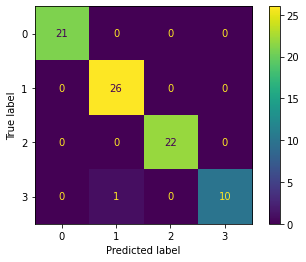

In [31]:
print('\nClassification Report:\n')
print(classification_report(y_test_encoded, final_label))
print('\nConfusion Matrix:\n')
cm = confusion_matrix(y_test_encoded, final_label)
print(cm)
print('\nAccuracy Score:\n')
print(accuracy_score(y_test_encoded, final_label))
print('\Confusion Matrix Display:\n')
print(ConfusionMatrixDisplay(cm).plot())

## Plotting correct and wrong prediction points

Filtering the wrong prediction points

In [32]:
false_prediction = y_test_encoded.reshape(-1,1) != final_label
x_test_wrong = x_test[false_prediction]
x_test_wrong


,LPR,PEG
64,0.26,0.2


Plot all the test data and the wrong prediction with another color

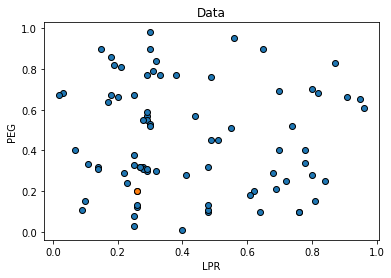

In [33]:
plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1],edgecolors='k',alpha=1)
plt.scatter(x_test_wrong.iloc[:,0],x_test_wrong.iloc[:,1],edgecolors='k',alpha=1)
plt.title('Data')
plt.xlabel('LPR')
plt.ylabel('PEG')
plt.show()

# One v One

##Preparing the data frames for the models

Read the files

In [34]:
df_train=pd.read_csv("DUMD_train.csv")
df_test=pd.read_csv("DUMD_test.csv")
df_test

,STG,SCG,STR,LPR,PEG,UNS
0,0.420,0.290,0.140,0.03,0.68,Medium
1,0.100,0.100,0.520,0.78,0.34,Medium
2,0.510,0.255,0.550,0.17,0.64,Medium
3,0.250,0.540,0.310,0.25,0.08,Very Low
4,0.258,0.250,0.295,0.33,0.77,High
...,...,...,...,...,...,...
75,0.520,0.440,0.820,0.30,0.52,Medium
76,0.288,0.310,0.790,0.23,0.24,Low
77,0.260,0.260,0.310,0.26,0.13,Very Low
78,0.990,0.490,0.070,0.70,0.69,High


Label encoder for train and test

In [35]:
labelencoder_y_train=LabelEncoder()
labelencoder_y_test=LabelEncoder()
df_train['UNS'] = labelencoder_y_train.fit_transform(df_train['UNS'])
df_test['UNS'] =labelencoder_y_test.fit_transform(df_test['UNS'])
df_train['UNS']

0      3
1      0
2      2
3      1
4      2
      ..
318    0
319    0
320    1
321    2
322    2
Name: UNS, Length: 323, dtype: int64

Seprate each two classes into data frames

In [36]:
df1_2 = df_train.loc[(df_train['UNS'] == 0) | (df_train['UNS'] == 1)]
df1_3 = df_train.loc[(df_train['UNS'] == 0) | (df_train['UNS'] == 2)]
df1_4 = df_train.loc[(df_train['UNS'] == 0) | (df_train['UNS'] == 3)]
df2_3 = df_train.loc[(df_train['UNS'] == 1) | (df_train['UNS'] == 2)]
df2_4 = df_train.loc[(df_train['UNS'] == 1) | (df_train['UNS'] == 3)]
df3_4 = df_train.loc[(df_train['UNS'] == 2) | (df_train['UNS'] == 3)]

dft1_2 = df_test.loc[(df_test['UNS'] == 0) | (df_test['UNS'] == 1)]
dft1_3 = df_test.loc[(df_test['UNS'] == 0) | (df_test['UNS'] == 2)]
dft1_4 = df_test.loc[(df_test['UNS'] == 0) | (df_test['UNS'] == 3)]
dft2_3 = df_test.loc[(df_test['UNS'] == 1) | (df_test['UNS'] == 2)]
dft2_4 = df_test.loc[(df_test['UNS'] == 1) | (df_test['UNS'] == 3)]
dft3_4 = df_test.loc[(df_test['UNS'] == 2) | (df_test['UNS'] == 3)]

df1_2

,STG,SCG,STR,LPR,PEG,UNS
1,0.08,0.08,0.10,0.24,0.90,0
3,0.08,0.08,0.08,0.98,0.24,1
6,0.20,0.14,0.35,0.72,0.25,1
7,0.00,0.00,0.50,0.20,0.85,0
8,0.18,0.18,0.55,0.30,0.81,0
...,...,...,...,...,...,...
316,0.64,0.59,0.12,0.58,0.24,1
317,0.68,0.61,0.34,0.31,0.23,1
318,0.90,0.78,0.62,0.32,0.89,0
319,0.85,0.82,0.66,0.83,0.83,0


Separate the train and test data for each class

In [37]:
x_train1_2=df1_2.loc[:,['LPR','PEG']]
y_train1_2=df1_2['UNS']
x_test1_2=dft1_2.loc[:,['LPR','PEG']]
y_test1_2=dft1_2['UNS']

x_train1_3=df1_3.loc[:,['LPR','PEG']]
y_train1_3=df1_3['UNS']
x_test1_3=dft1_3.loc[:,['LPR','PEG']]
y_test1_3=dft1_3['UNS']

x_train1_4=df1_4.loc[:,['LPR','PEG']]
y_train1_4=df1_4['UNS']
x_test1_4=dft1_4.loc[:,['LPR','PEG']]
y_test1_4=dft1_4['UNS']

x_train2_3=df2_3.loc[:,['LPR','PEG']]
y_train2_3=df2_3['UNS']
x_test2_3=dft2_3.loc[:,['LPR','PEG']]
y_test2_3=dft2_3['UNS']

x_train2_4=df2_4.loc[:,['LPR','PEG']]
y_train2_4=df2_4['UNS']
x_test2_4=dft2_4.loc[:,['LPR','PEG']]
y_test2_4=dft2_4['UNS']

x_train3_4=df3_4.loc[:,['LPR','PEG']]
y_train3_4=df3_4['UNS']
x_test3_4=dft3_4.loc[:,['LPR','PEG']]
y_test3_4=dft3_4['UNS']


# y = (y_train3_4 == 3)*1
# print(y_train3_4)


## First model 

SVM for the first model

In [38]:
clf1_2 = svm.SVC(probability=True)
clf1_2.fit(x_train1_2, y_train1_2)
y1_2_pred = clf1_2.predict(x_test1_2)
y1_2_pred_prop = clf1_2.predict_proba(x_test)

print('\nAccuracy Score:\n')
print(accuracy_score(y_test1_2, y1_2_pred))


Accuracy Score:

1.0


Accuracies and confusion matrix of the model


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        26

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47


Confusion Matrix:

[[21  0]
 [ 0 26]]

Accuracy Score:

1.0
\Confusion Matrix Display:



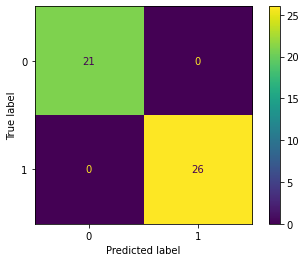

In [39]:
print('\nClassification Report:\n')
print(classification_report(y_test1_2, y1_2_pred))
print('\nConfusion Matrix:\n')
cm = confusion_matrix(y_test1_2, y1_2_pred)
print(cm)
print('\nAccuracy Score:\n')
print(accuracy_score(y_test1_2, y1_2_pred))
print('\Confusion Matrix Display:\n')
print(ConfusionMatrixDisplay(cm).plot())

Plot the decision boundaries for the model

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


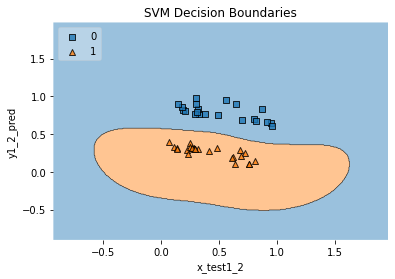

In [40]:
plot_decision_regions(x_test1_2.to_numpy(), y1_2_pred, clf=clf1_2, legend=2)

plt.title('SVM Decision Boundaries')
plt.xlabel('x_test1_2')
plt.ylabel('y1_2_pred')
plt.show()

## Second model

SVM for the second model

In [41]:
clf1_3 = svm.SVC(probability=True)
clf1_3.fit(x_train1_3, y_train1_3)
y1_3_pred = clf1_3.predict(x_test1_3)
y1_3_pred_prop = clf1_3.predict_proba(x_test)

print('\nAccuracy Score:\n')
print(accuracy_score(y_test1_3, y1_3_pred))


Accuracy Score:

1.0


Accuracies and confusion matrix of the model


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        22

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43


Confusion Matrix:

[[21  0]
 [ 0 22]]

Accuracy Score:

1.0
\Confusion Matrix Display:



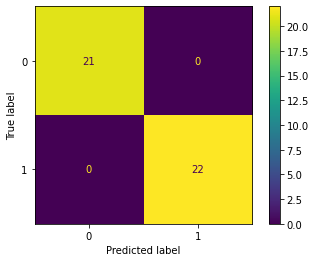

In [42]:
print('\nClassification Report:\n')
print(classification_report(y_test1_3, y1_3_pred))
print('\nConfusion Matrix:\n')
cm = confusion_matrix(y_test1_3, y1_3_pred)
print(cm)
print('\nAccuracy Score:\n')
print(accuracy_score(y_test1_3, y1_3_pred))
print('\Confusion Matrix Display:\n')
print(ConfusionMatrixDisplay(cm).plot())

Plot the decision boundaries for the model

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


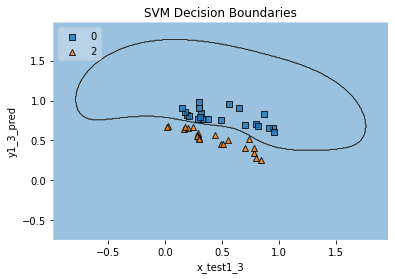

In [43]:
plot_decision_regions(x_test1_3.to_numpy(), y1_3_pred, clf=clf1_3, legend=2)

plt.title('SVM Decision Boundaries')
plt.xlabel('x_test1_3')
plt.ylabel('y1_3_pred')
plt.show()

## Third model

SVM for the third model

In [44]:
clf1_4 = svm.SVC(probability=True)
clf1_4.fit(x_train1_4, y_train1_4)
y1_4_pred = clf1_4.predict(x_test1_4)
y1_4_pred_prop = clf1_4.predict_proba(x_test)

print('\nAccuracy Score:\n')
print(accuracy_score(y_test1_4, y1_4_pred))


Accuracy Score:

1.0


Accuracies and confusion matrix of the model


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        11

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32


Confusion Matrix:

[[21  0]
 [ 0 11]]

Accuracy Score:

1.0
\Confusion Matrix Display:



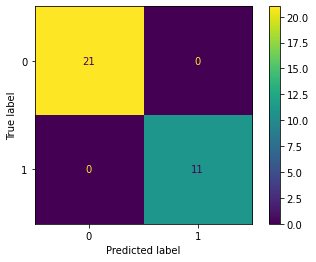

In [45]:
print('\nClassification Report:\n')
print(classification_report(y_test1_4, y1_4_pred))
print('\nConfusion Matrix:\n')
cm = confusion_matrix(y_test1_4, y1_4_pred)
print(cm)
print('\nAccuracy Score:\n')
print(accuracy_score(y_test1_4, y1_4_pred))
print('\Confusion Matrix Display:\n')
print(ConfusionMatrixDisplay(cm).plot())

Plot the decision boundaries for the model

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


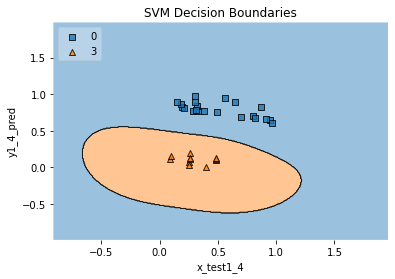

In [46]:
plot_decision_regions(x_test1_4.to_numpy(), y1_4_pred, clf=clf1_4, legend=2)

plt.title('SVM Decision Boundaries')
plt.xlabel('x_test1_4')
plt.ylabel('y1_4_pred')
plt.show()

## Fourth model

SVM for the fourth model

In [47]:
clf2_3 = svm.SVC(probability=True)
clf2_3.fit(x_train2_3, y_train2_3)
y2_3_pred = clf2_3.predict(x_test2_3)
y2_3_pred_prop = clf2_3.predict_proba(x_test)

print('\nAccuracy Score:\n')
print(accuracy_score(y_test2_3, y2_3_pred))


Accuracy Score:

1.0


Accuracies and confusion matrix of the model


Classification Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        22

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48


Confusion Matrix:

[[26  0]
 [ 0 22]]

Accuracy Score:

1.0
\Confusion Matrix Display:



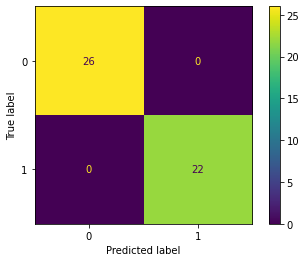

In [48]:
print('\nClassification Report:\n')
print(classification_report(y_test2_3, y2_3_pred))
print('\nConfusion Matrix:\n')
cm = confusion_matrix(y_test2_3, y2_3_pred)
print(cm)
print('\nAccuracy Score:\n')
print(accuracy_score(y_test2_3, y2_3_pred))
print('\Confusion Matrix Display:\n')
print(ConfusionMatrixDisplay(cm).plot())

Plot the decision boundaries for the model

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


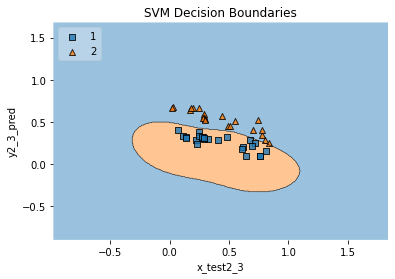

In [49]:
plot_decision_regions(x_test2_3.to_numpy(), y2_3_pred, clf=clf2_3, legend=2)

plt.title('SVM Decision Boundaries')
plt.xlabel('x_test2_3')
plt.ylabel('y2_3_pred')
plt.show()

## Fifth model

SVM for the fifth model

In [50]:
clf2_4 = svm.SVC(probability=True)
clf2_4.fit(x_train2_4, y_train2_4)
y2_4_pred = clf2_4.predict(x_test2_4)
y2_4_pred_prop = clf2_4.predict_proba(x_test)
print(y2_4_pred_prop)
print('\nAccuracy Score:\n')
print(accuracy_score(y_test2_4, y2_4_pred))

[[8.07023366e-01 1.92976634e-01]
 [9.93011796e-01 6.98820411e-03]
 [9.16983007e-01 8.30169933e-02]
 [7.47748008e-03 9.92522520e-01]
 [7.01786079e-01 2.98213921e-01]
 [6.32056640e-01 3.67943360e-01]
 [9.92804545e-01 7.19545503e-03]
 [6.33947231e-01 3.66052769e-01]
 [9.88313911e-01 1.16860886e-02]
 [9.50614834e-01 4.93851656e-02]
 [9.92035243e-01 7.96475727e-03]
 [9.97403583e-01 2.59641724e-03]
 [6.60562562e-01 3.39437438e-01]
 [3.80189128e-02 9.61981087e-01]
 [7.10606565e-01 2.89393435e-01]
 [9.95400010e-01 4.59999007e-03]
 [9.91877060e-01 8.12294037e-03]
 [6.47495267e-01 3.52504733e-01]
 [9.83747494e-01 1.62525064e-02]
 [9.71512858e-01 2.84871424e-02]
 [9.88158387e-01 1.18416133e-02]
 [9.94482788e-01 5.51721174e-03]
 [8.93736587e-01 1.06263413e-01]
 [9.75285173e-01 2.47148273e-02]
 [9.62829521e-01 3.71704793e-02]
 [9.92150950e-01 7.84905016e-03]
 [9.83823137e-01 1.61768630e-02]
 [6.69228477e-01 3.30771523e-01]
 [9.94934869e-01 5.06513139e-03]
 [5.89065979e-01 4.10934021e-01]
 [6.306587

Accuracies and confusion matrix of the model


Classification Report:

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        26
           3       1.00      0.91      0.95        11

    accuracy                           0.97        37
   macro avg       0.98      0.95      0.97        37
weighted avg       0.97      0.97      0.97        37


Confusion Matrix:

[[26  0]
 [ 1 10]]

Accuracy Score:

0.972972972972973
\Confusion Matrix Display:



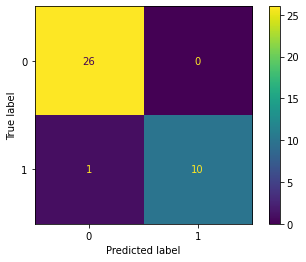

In [51]:
print('\nClassification Report:\n')
print(classification_report(y_test2_4, y2_4_pred))
print('\nConfusion Matrix:\n')
cm = confusion_matrix(y_test2_4, y2_4_pred)
print(cm)
print('\nAccuracy Score:\n')
print(accuracy_score(y_test2_4, y2_4_pred))
print('\Confusion Matrix Display:\n')
print(ConfusionMatrixDisplay(cm).plot())

Plot the decision boundaries for the model

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


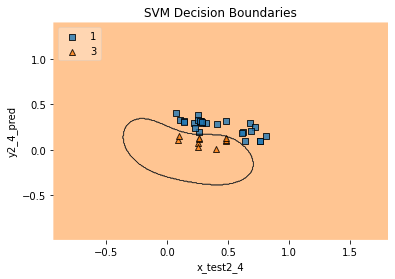

In [52]:
plot_decision_regions(x_test2_4.to_numpy(), y2_4_pred, clf=clf2_4, legend=2)

plt.title('SVM Decision Boundaries')
plt.xlabel('x_test2_4')
plt.ylabel('y2_4_pred')
plt.show()

## Sixth Model

SVM for the sixth model

In [53]:
clf3_4 = svm.SVC(probability=True)
clf3_4.fit(x_train3_4, y_train3_4)
y3_4_pred = clf3_4.predict(x_test3_4)
y3_4_pred_prop = clf3_4.predict_proba(x_test)

print('\nAccuracy Score:\n')
print(accuracy_score(y_test3_4, y3_4_pred))


Accuracy Score:

1.0


Accuracies and confusion matrix of the model


Classification Report:

              precision    recall  f1-score   support

           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        11

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33


Confusion Matrix:

[[22  0]
 [ 0 11]]

Accuracy Score:

1.0
\Confusion Matrix Display:



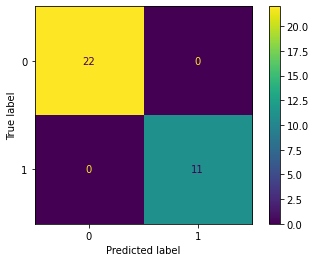

In [54]:
print('\nClassification Report:\n')
print(classification_report(y_test3_4, y3_4_pred))
print('\nConfusion Matrix:\n')
cm = confusion_matrix(y_test3_4, y3_4_pred)
print(cm)
print('\nAccuracy Score:\n')
print(accuracy_score(y_test3_4, y3_4_pred))
print('\Confusion Matrix Display:\n')
print(ConfusionMatrixDisplay(cm).plot())

Plot the decision boundaries for the model

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


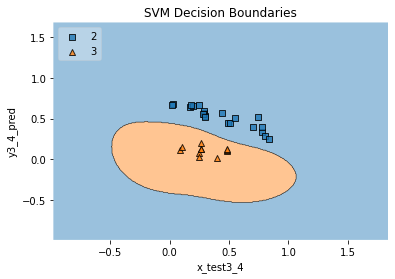

In [55]:
plot_decision_regions(x_test3_4.to_numpy(), y3_4_pred, clf=clf3_4, legend=2)

plt.title('SVM Decision Boundaries')
plt.xlabel('x_test3_4')
plt.ylabel('y3_4_pred')
plt.show()

## Final label of OvO

1_2 / 1_3 / 1_4 / 2_3 /  2_4 /  3_4

In [56]:
y0_prob = ((y1_2_pred_prop[:,0] + y1_3_pred_prop[:,0] + y1_4_pred_prop[:,0]) / 3).reshape(-1,1)
y1_prob = ((y1_2_pred_prop[:,1] + y2_3_pred_prop[:,0] + y2_4_pred_prop[:,0]) / 3).reshape(-1,1)
y2_prob = ((y1_3_pred_prop[:,1] + y2_3_pred_prop[:,1] + y3_4_pred_prop[:,0]) / 3).reshape(-1,1)
y3_prob = ((y1_4_pred_prop[:,1] + y2_4_pred_prop[:,1] + y3_4_pred_prop[:,1]) / 3).reshape(-1,1)

y0_prob

array([[0.63538624],
       [0.29886414],
       [0.6210198 ],
       [0.07801845],
       [0.96240398],
       [0.99224306],
       [0.31298927],
       [0.99035729],
       [0.03493893],
       [0.57130824],
       [0.32540759],
       [0.13474942],
       [0.97153036],
       [0.05416397],
       [0.95214515],
       [0.07581746],
       [0.36401165],
       [0.98944874],
       [0.03377791],
       [0.50575279],
       [0.02672161],
       [0.03502452],
       [0.64964738],
       [0.52799832],
       [0.57004234],
       [0.07674447],
       [0.47864997],
       [0.96949117],
       [0.21438793],
       [0.98753186],
       [0.98561742],
       [0.99238644],
       [0.71046637],
       [0.98939355],
       [0.03647525],
       [0.98657691],
       [0.04076206],
       [0.03311259],
       [0.11007114],
       [0.03981757],
       [0.20351198],
       [0.98871987],
       [0.07937284],
       [0.42734464],
       [0.05783836],
       [0.98995432],
       [0.03852136],
       [0.990

In [57]:
ybo_all = np.hstack((y0_prob, y1_prob, y2_prob, y3_prob))
ybo_all

array([[0.63538624, 0.31748206, 0.96034218, 0.08678951],
       [0.29886414, 0.64168376, 0.98002753, 0.07942456],
       [0.6210198 , 0.35028835, 0.98422272, 0.04446912],
       [0.07801845, 0.64581887, 0.28580461, 0.99035807],
       [0.96240398, 0.24402616, 0.68650426, 0.1070656 ],
       [0.99224306, 0.22368056, 0.63002664, 0.15404974],
       [0.31298927, 0.64188348, 0.9591372 , 0.08599005],
       [0.99035729, 0.22905341, 0.64748919, 0.1331001 ],
       [0.03493893, 0.98301593, 0.54200329, 0.44004185],
       [0.57130824, 0.40402138, 0.98875392, 0.03591647],
       [0.32540759, 0.63169915, 0.96283894, 0.08005433],
       [0.13474942, 0.88270366, 0.77175927, 0.21078765],
       [0.97153036, 0.23480284, 0.67232033, 0.12134647],
       [0.05416397, 0.6659663 , 0.30042826, 0.97944148],
       [0.95214515, 0.24653548, 0.69777925, 0.10354012],
       [0.07581746, 0.95907331, 0.68106956, 0.28403967],
       [0.36401165, 0.59106783, 0.98424002, 0.0606805 ],
       [0.98944874, 0.23271306,

In [58]:
final_labelo = np.argmax(ybo_all, axis=1)
final_labelo = final_labelo.reshape((-1,1))
final_labelo

array([[2],
       [2],
       [2],
       [3],
       [0],
       [0],
       [2],
       [0],
       [1],
       [2],
       [2],
       [1],
       [0],
       [3],
       [0],
       [1],
       [2],
       [0],
       [1],
       [2],
       [1],
       [1],
       [2],
       [2],
       [2],
       [1],
       [2],
       [0],
       [2],
       [0],
       [0],
       [0],
       [2],
       [0],
       [1],
       [0],
       [1],
       [3],
       [1],
       [1],
       [2],
       [0],
       [1],
       [2],
       [1],
       [0],
       [1],
       [0],
       [3],
       [1],
       [2],
       [0],
       [1],
       [0],
       [1],
       [3],
       [1],
       [1],
       [2],
       [0],
       [0],
       [1],
       [3],
       [2],
       [1],
       [3],
       [3],
       [3],
       [0],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [1],
       [3],
       [0],
       [1]])


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.96      1.00      0.98        26
           2       1.00      1.00      1.00        22
           3       1.00      0.91      0.95        11

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.98        80
weighted avg       0.99      0.99      0.99        80


Confusion Matrix:

[[21  0  0  0]
 [ 0 26  0  0]
 [ 0  0 22  0]
 [ 0  1  0 10]]

Accuracy Score:

0.9875
\Confusion Matrix Display:



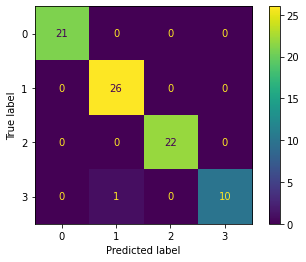

In [59]:
print('\nClassification Report:\n')
print(classification_report(y_test_encoded, final_labelo))
print('\nConfusion Matrix:\n')
cm = confusion_matrix(y_test_encoded, final_labelo)
print(cm)
print('\nAccuracy Score:\n')
print(accuracy_score(y_test_encoded, final_labelo))
print('\Confusion Matrix Display:\n')
print(ConfusionMatrixDisplay(cm).plot())

## Filtering the wrong prediction points

In [60]:
false_predictiono = y_test_encoded.reshape(-1,1) != final_labelo
x_test_wrongo = x_test[false_predictiono]
x_test_wrongo

,LPR,PEG
64,0.26,0.2


## Plot all the test data and the wrong prediction with another color

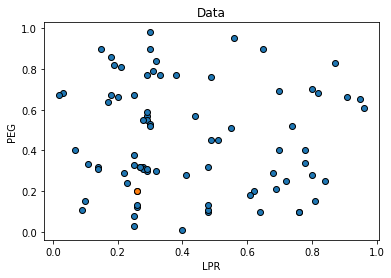

In [61]:
plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1],edgecolors='k',alpha=1)
plt.scatter(x_test_wrongo.iloc[:,0],x_test_wrongo.iloc[:,1],edgecolors='k',alpha=1)
plt.title('Data')
plt.xlabel('LPR')
plt.ylabel('PEG')
plt.show()